#Đọc ảnh

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
def read_image(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  img = np.array(img)
  return img

In [3]:
I_1 = read_image('/content/drive/MyDrive/Kì 6/Xử lý ảnh và thị giác máy tính/Data/Picture1.png')
I_2 = read_image('/content/drive/MyDrive/Kì 6/Xử lý ảnh và thị giác máy tính/Data/Picture4.png')
I_3 = read_image('/content/drive/MyDrive/Kì 6/Xử lý ảnh và thị giác máy tính/Data/Picture6.jpg')

#Xây dựng và cài đặt thuật toán

##Lọc trung bình

In [4]:
def nhap_mat_na():
  k = int(input('Nhập kích thước: '))
  H = np.zeros((k, k))
  for i in range(k):
    for j in range(k):
      H[i][j] = int(input(f'Nhập H[{i}][{j}]: '))
  return np.array(H)

In [5]:
def loc_trung_binh(I, H, nguong):
  # Lấy kích thước của ảnh
  dong, cot = I.shape
  # Lấy kích thước của mặt nạ
  dong_H, cot_H = H.shape
  # Tạo ảnh kết quả có mặt
  result = np.copy(I)
  #Tính độ lệch padding bỏ qua các phần biên
  pad_dong = dong_H // 2
  pad_cot = cot_H // 2
  #Lọc qua từng điểm ảnh
  for i in range(dong):
    for j in range(cot):
      # Lấy phần ảnh cần tính tích chập
      temp = I[i:i+dong_H, j:j+cot_H]
      # Xác định vùng cần lọc ảnh sao cho cửa sổ lọc nằm trong ảnh
      if temp.shape == H.shape:
        mean = np.sum(temp * H) / np.sum(H)
        # Kiểm tra ngưỡng:
        if np.abs(I[i, j] - mean) <= nguong:
          result[i][j] = I[i, j] # Giữ nguyên giá trị
        else:
          result[i][j] = mean # Thay thế giá trị điểm ảnh hiện tại bằng giá trị trung bình

  return result #Trả về ảnh kết quả

##Lọc trung vị

In [6]:
def Loc_trung_vi(I, mat_na, nguong):
    # Lấy kích thước của ảnh
    dong, cot = I.shape
    # Tạo khung mặt nạ
    H = np.zeros((mat_na, mat_na))
    dong_H, cot_H = H.shape
    # Tạo ảnh kết quả có mặt
    result = np.copy(I)
    #Lọc qua từng điểm ảnh
    for i in range(dong):
      for j in range(cot):
        # Lấy phần ảnh cần tính tích chập
        temp = I[i:i+dong_H, j:j+cot_H]
        # Xác định vùng cần lọc ảnh sao cho cửa sổ lọc nằm trong ảnh
        if temp.shape == H.shape:
          median = np.median(temp)
          # Kiểm tra ngưỡng:
          if abs(I[i, j] - median) <= nguong:
            result[i][j] = I[i, j] # Giữ nguyên giá trị
          else:
            result[i][j] = median # Thay thế giá trị điểm ảnh hiện tại bằng giá trị trung vị

    return result #Trả về ảnh kết quả

#Kết quả xử lý ảnh

In [7]:
# Hàm in ảnh
def show_image(I, title):
  plt.imshow(I, cmap='gray')
  plt.title(title)
  plt.axis('off')

##Lọc trung bình


In [18]:
# Nhập mặt nạ
print('Nhập mặt nạ H_1:')
H_1 = nhap_mat_na()
H_2 = nhap_mat_na()
H_3 = nhap_mat_na()

Nhập mặt nạ H_1:
Nhập kích thước: 3
Nhập H[0][0]: 1
Nhập H[0][1]: 1
Nhập H[0][2]: 1
Nhập H[1][0]: 1
Nhập H[1][1]: 1
Nhập H[1][2]: 1
Nhập H[2][0]: 1
Nhập H[2][1]: 1
Nhập H[2][2]: 1


In [19]:
# Sử dụng hàm để lọc với mặt nạ H_1
I_1_loc_tb_H1 = loc_trung_binh(I_1, H_1, 50)
I_2_loc_tb_H1 = loc_trung_binh(I_2, H_1, 50)
I_3_loc_tb_H1 = loc_trung_binh(I_3, H_1, 50)

In [12]:
# Sử dụng hàm để lọc với mặt nạ H_2
# I_1_loc_tb_H2 = loc_trung_binh(I_1, H_2, 50)
# I_2_loc_tb_H2 = loc_trung_binh(I_2, H_2, 50)
# I_3_loc_tb_H2 = loc_trung_binh(I_3, H_2, 50)

In [13]:
# Sử dụng hàm để lọc với mặt nạ H_3
# I_1_loc_tb_H3 = loc_trung_binh(I_1, H_3, 50)
# I_2_loc_tb_H3 = loc_trung_binh(I_2, H_3, 50)
# I_3_loc_tb_H3 = loc_trung_binh(I_3, H_3, 50)

## Lọc trung vị

In [20]:
I_1_loc_tv = Loc_trung_vi(I_1, 3, 50)
I_2_loc_tv = Loc_trung_vi(I_2, 3, 50)
I_3_loc_tv = Loc_trung_vi(I_3, 3, 50)

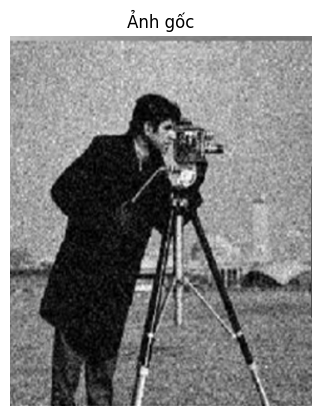

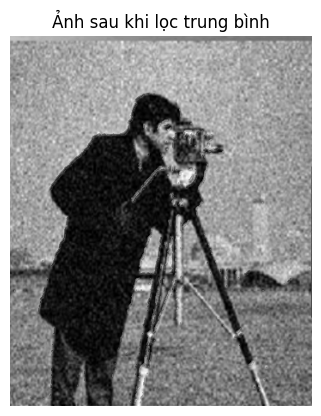

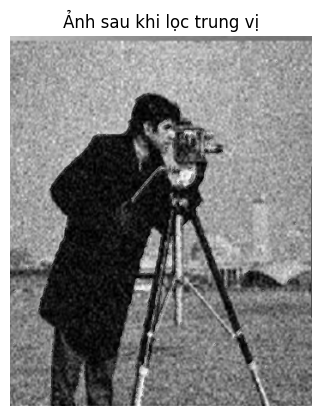

In [21]:
#Show kết quả ảnh 1
show_image(I_1, 'Ảnh gốc')
plt.show()
# plt.subplot(3, 4, 5)
show_image(I_1_loc_tb_H1, 'Ảnh sau khi lọc trung bình')
plt.show()
# plt.subplot(3, 4, 6)
# show_image(I_1_loc_tb_H2,"Ảnh sau khi lọc trung bình")
# plt.subplot(3, 4, 7)
# show_image(I_1_loc_tb_H3, '')
# plt.subplot(3, 4, 9)
show_image(I_1_loc_tv, 'Ảnh sau khi lọc trung vị')
plt.show()

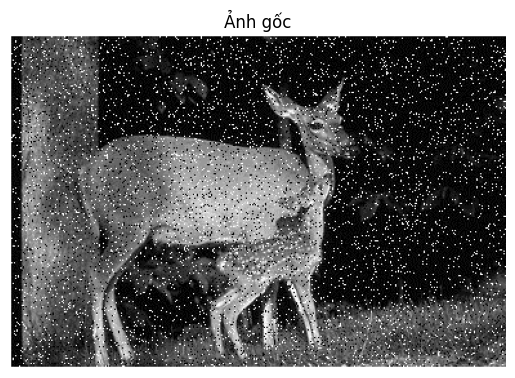

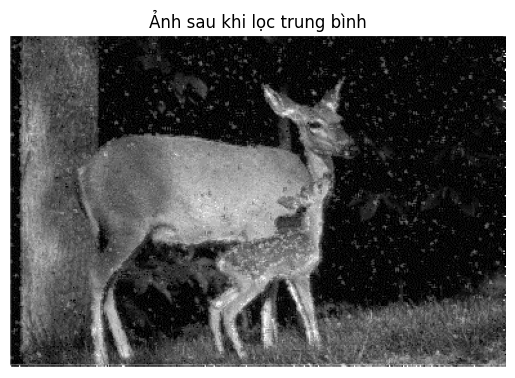

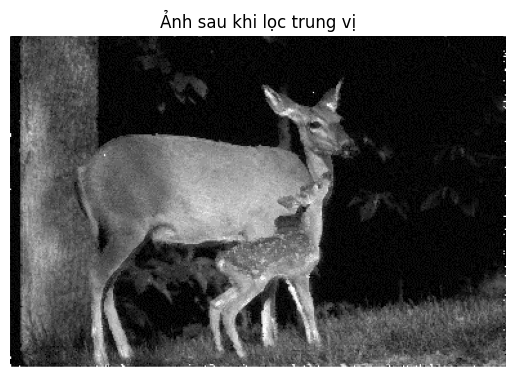

In [22]:
#Show kết quả ảnh 2
# plt.subplot(3, 4, 1)
show_image(I_2, 'Ảnh gốc')
plt.show()
# plt.subplot(3, 4, 5)
# plt.subplot(3, 4, 6)
show_image(I_2_loc_tb_H1,"Ảnh sau khi lọc trung bình")
plt.show()
# plt.subplot(3, 4, 7)
# show_image(I_2_loc_tb_H3, '')
# plt.subplot(3, 4, 9)
show_image(I_2_loc_tv, 'Ảnh sau khi lọc trung vị')
plt.show()

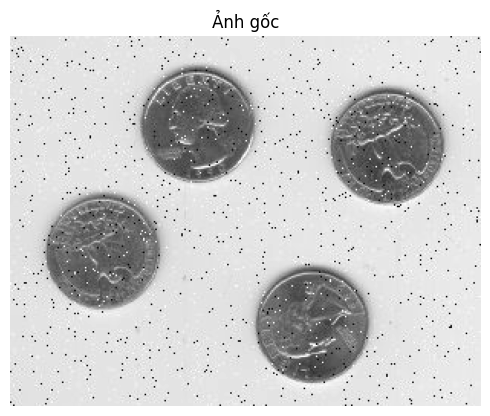

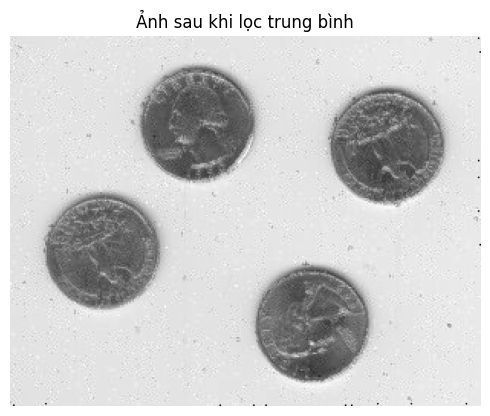

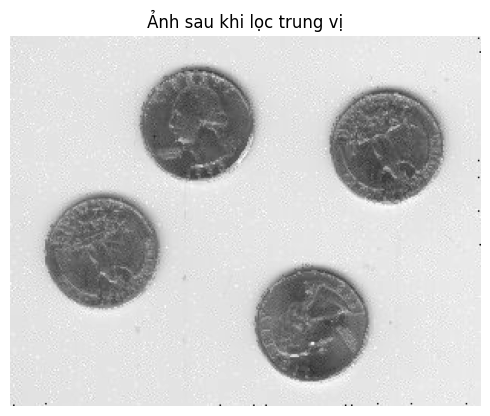

In [23]:
#Show kết quả ảnh 3
# plt.subplot(3, 4, 1)
show_image(I_3, 'Ảnh gốc')
plt.show()
# plt.subplot(3, 4, 5)
# plt.subplot(3, 4, 6)
show_image(I_3_loc_tb_H1,"Ảnh sau khi lọc trung bình")
plt.show()
# plt.subplot(3, 4, 7)
# show_image(I_3_loc_tb_H3, '')
# plt.subplot(3, 4, 9)
show_image(I_3_loc_tv, 'Ảnh sau khi lọc trung vị')
plt.show()